## Installing import dependencies and packages

In [2]:
!pip install pystan

  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached aiohttp-3.9.0-cp38-cp38-win_amd64.whl (366 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp38-cp38-win_amd64.whl (151 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1-cp38-cp38-win_amd64.whl (79.8 MB)



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip --version

pip 23.0.1 from D:\Anaconda3\lib\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pip --upgrade 

  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install prophet

     ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
     - -------------------------------------- 0.4/13.3 MB 7.8 MB/s eta 0:00:02
     -- ------------------------------------- 0.8/13.3 MB 8.1 MB/s eta 0:00:02
     -- ------------------------------------- 0.9/13.3 MB 6.7 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/13.3 MB 6.6 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/13.3 MB 6.6 MB/s eta 0:00:02
     --- ------------------------------------ 1.2/13.3 MB 4.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/13.3 MB 4.5 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/13.3 MB 4.3 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/13.3 MB 4.4 MB/s eta 0:00:03
     ----- ---------------------------------- 2.0/13.3 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/13.3 MB 4.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/13.3 MB 4


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Directory containting all attributes of Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

## Reading the Data & Data Preprocessing

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv')
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
df.shape

(49068, 10)

In [5]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
df['Date'].nunique()

188

In [9]:
df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006
2020-07-24,15791645,639650,8939705,6212290
2020-07-25,16047190,644517,9158743,6243930


In [10]:
daily_cases = df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

## Data Preprocessing

In [11]:
df_prophet = daily_cases.rename(columns={'Date':'ds','Confirmed':'y'})
df_prophet.head(5)

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [12]:
m = Prophet()
model = m.fit(df_prophet)

11:59:12 - cmdstanpy - INFO - Chain [1] start processing
11:59:14 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [15]:
future_global = model.make_future_dataframe(periods = 30, freq = "D")
future_global.head(5)

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [23]:
df_prophet.shape

(188, 5)

In [22]:
future_global.shape

(218, 1)

In [17]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [18]:
future_global['ds'].tail()

213   2020-08-22
214   2020-08-23
215   2020-08-24
216   2020-08-25
217   2020-08-26
Name: ds, dtype: datetime64[ns]

In [20]:
predictions = model.predict(future_global)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.252055e+05,7.690033e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.093288e+05,1.011007e+05,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-1.036742e+05,1.107177e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-9.044659e+04,1.163045e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.932883e+04,1.188947e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144682e+07,2.109166e+07,2.182907e+07,2.109723e+07,2.181663e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,2.146049e+07
214,2020-08-23,2.165106e+07,2.126069e+07,2.202898e+07,2.127342e+07,2.204634e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,2.165828e+07
215,2020-08-24,2.185531e+07,2.142005e+07,2.228074e+07,2.145353e+07,2.227735e+07,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,0.0,0.0,0.0,2.185316e+07
216,2020-08-25,2.205955e+07,2.160521e+07,2.248871e+07,2.163350e+07,2.251087e+07,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,-16782.130444,0.0,0.0,0.0,2.204276e+07


In [21]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.146049e+07,2.109166e+07,2.182907e+07
214,2020-08-23,2.165828e+07,2.126069e+07,2.202898e+07
215,2020-08-24,2.185316e+07,2.142005e+07,2.228074e+07
216,2020-08-25,2.204276e+07,2.160521e+07,2.248871e+07
217,2020-08-26,2.225280e+07,2.177584e+07,2.275015e+07


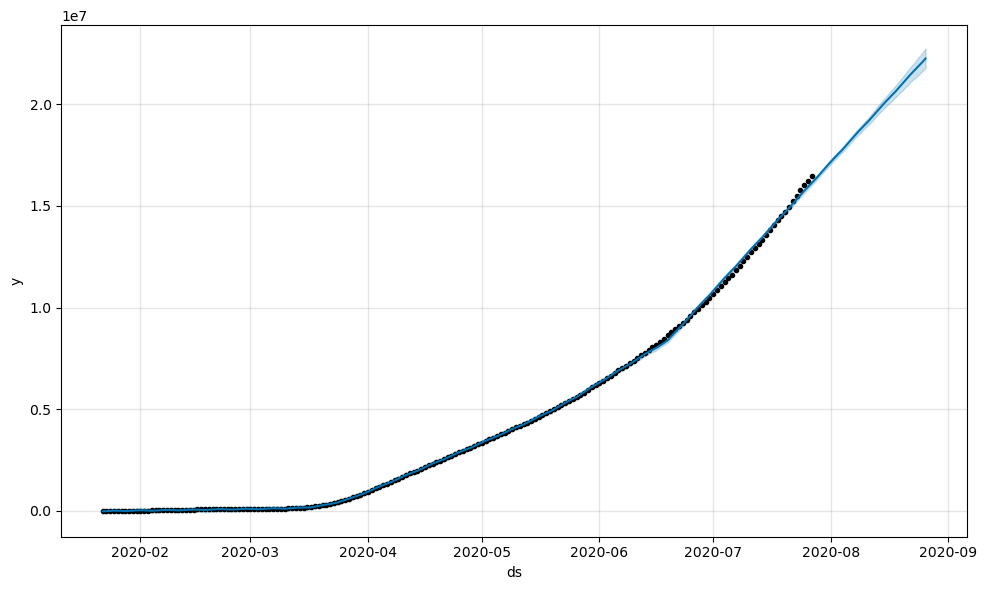

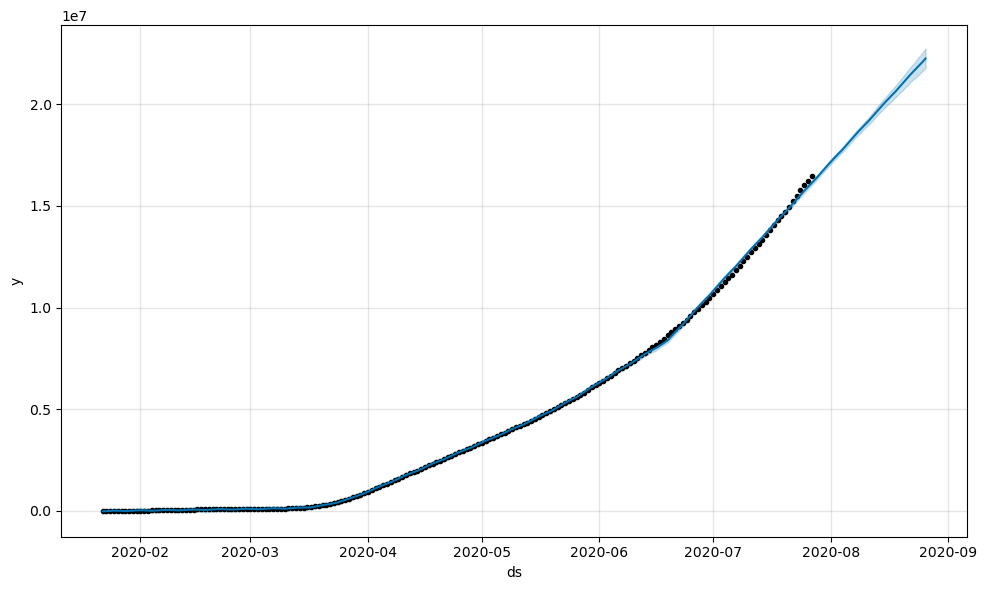

In [23]:
#### plot the predictions u will see these are with respect to yhat
model.plot(predictions)

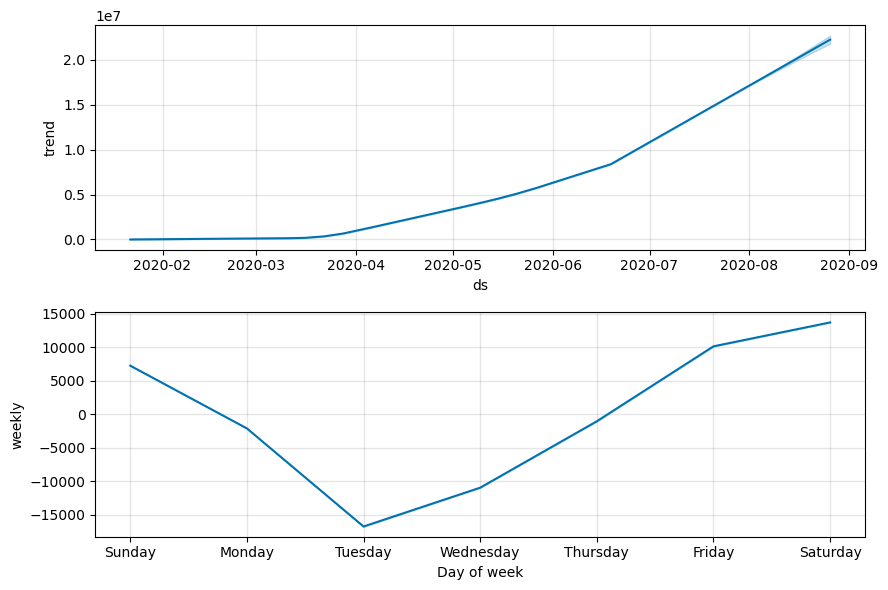

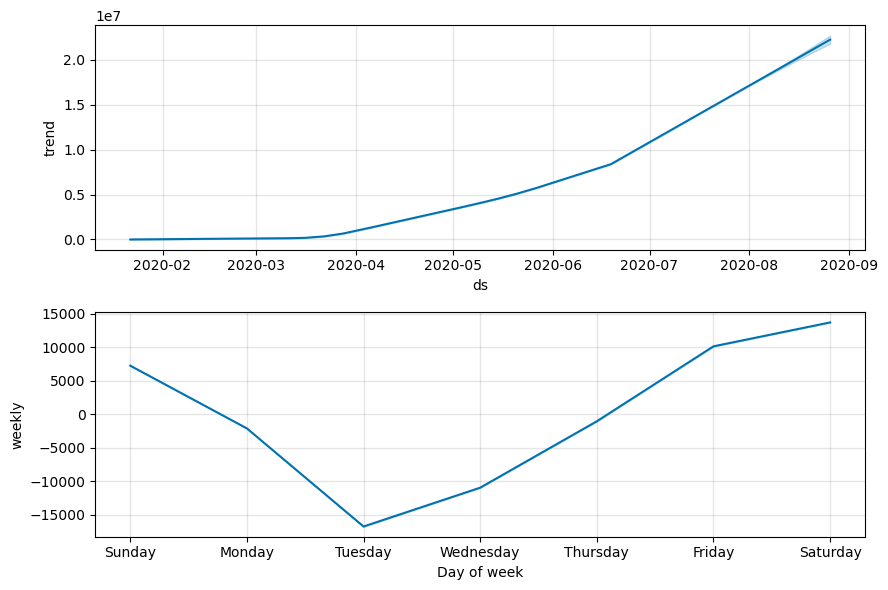

In [25]:
##### Visualize Each Components[Trends,Weekly]
model.plot_components(predictions)

In [27]:
#### The prophet model identifies points at which the trend changes and those can be plotted.¶
from prophet.plot import add_changepoints_to_plot

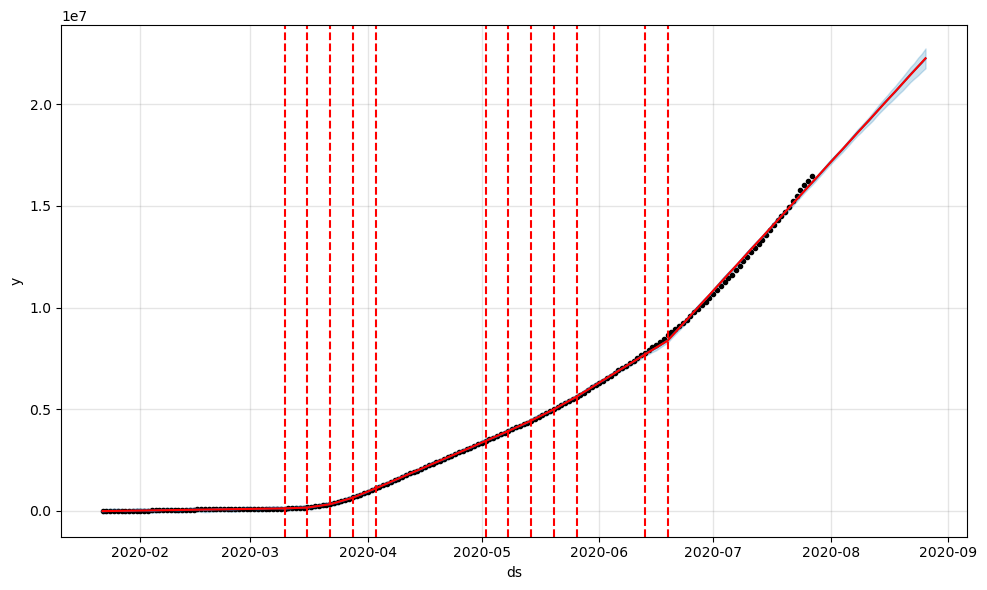

In [28]:
fig=model.plot(predictions)

a=add_changepoints_to_plot(fig.gca(),model,predictions)

<Axes: xlabel='ds', ylabel='y'>

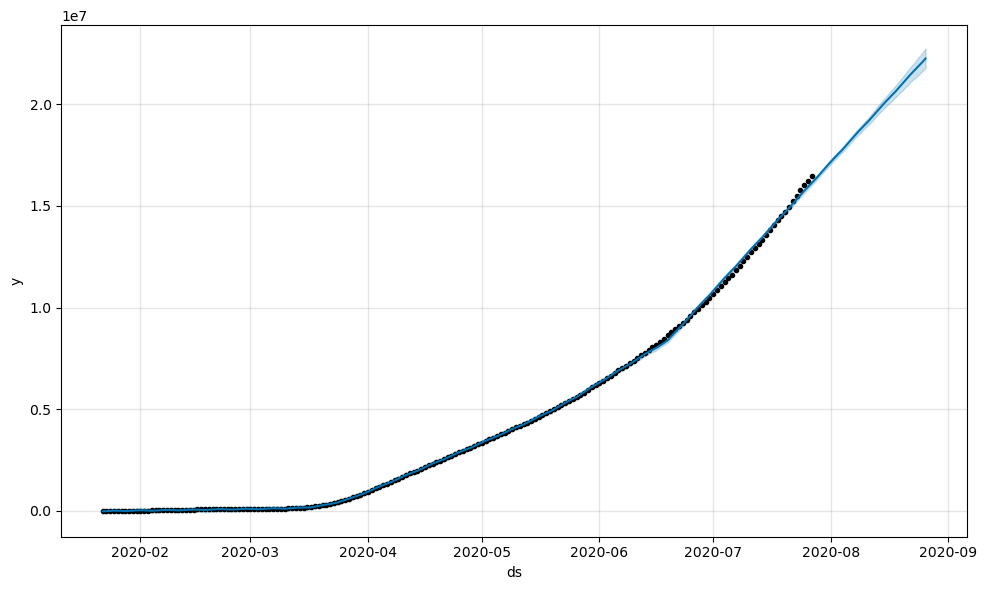

In [29]:
fig = model.plot(predictions)
fig.gca()

In [30]:
from prophet.diagnostics import cross_validation

In [31]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')
## horizon='365 days'--> for how many days we have to cross validate=====

## Computes forecasts from historical cutoff points Beginning from..

## (end - horizon) it means it is going to take that date that is (end - horizon) bcz on these date we have to just 
## cross-validate for the new dataset that we have to find out

## period=180 as from documentation of func as period=0.5*365=180 or {period=1/2*horizon value}
## initial -How many total no. of days we actually want-- 3*365 from documentation of function or  {initial=3*horizon}

  0%|          | 0/5 [00:00<?, ?it/s]

12:49:07 - cmdstanpy - INFO - Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
12:49:08 - cmdstanpy - INFO - Chain [1] start processing
12:49:08 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing
12:49:09 - cmdstanpy - INFO - Chain [1] start processing
12:49:09 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
df_cv.shape

(150, 6)

In [39]:
df_cv.head(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195686e+06,3.206241e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279225e+06,3.291337e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361966e+06,3.377555e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.438280e+06,3.461628e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513099e+06,3.546281e+06,3515244,2020-04-28


In [34]:
df_cv.tail(5)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
145,2020-07-23,1.314570e+07,1.287906e+07,1.341458e+07,15510481,2020-06-27
146,2020-07-24,1.328508e+07,1.300453e+07,1.357887e+07,15791645,2020-06-27
147,2020-07-25,1.342126e+07,1.311948e+07,1.371535e+07,16047190,2020-06-27
148,2020-07-26,1.353973e+07,1.323304e+07,1.384769e+07,16251796,2020-06-27
149,2020-07-27,1.366495e+07,1.333950e+07,1.400063e+07,16480485,2020-06-27


#### Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.


In [35]:
from prophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.747964e+10,165769.854185,129605.994741,0.016905,0.017661,0.017089,0.000000
1,4 days,3.803963e+10,195037.510835,151820.709845,0.019368,0.022477,0.019615,0.000000
2,5 days,5.212547e+10,228310.040657,175674.511884,0.021819,0.025671,0.022140,0.066667
3,6 days,6.989523e+10,264377.060163,202672.823022,0.024597,0.026657,0.025010,0.133333
4,7 days,9.074055e+10,301231.723088,233035.960912,0.027880,0.031214,0.028407,0.200000


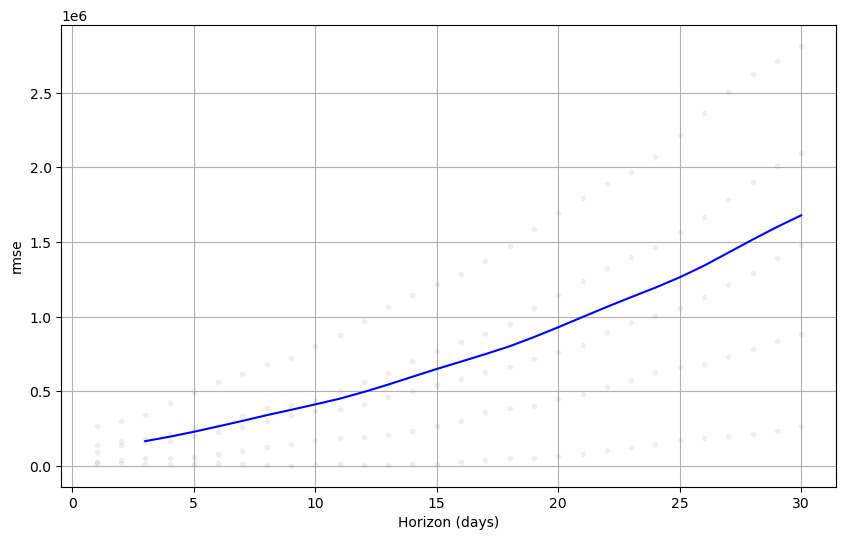

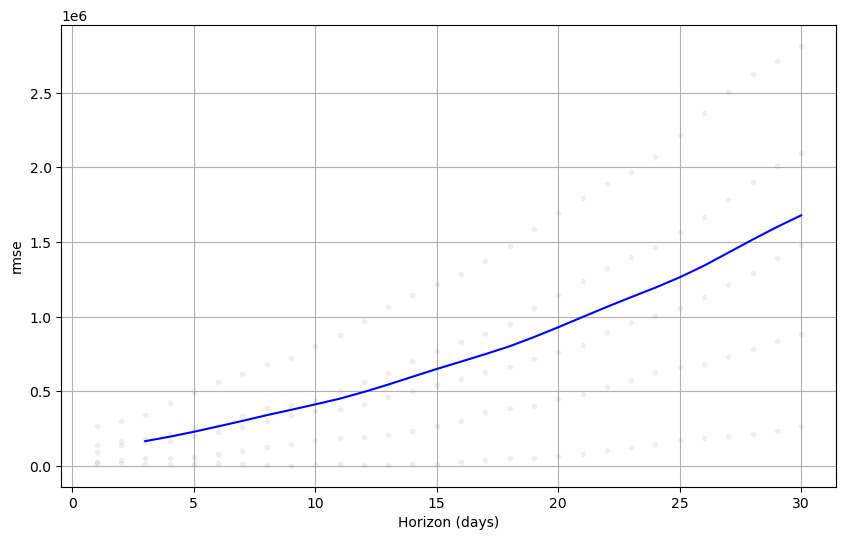

In [43]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv, metric = 'rmse')

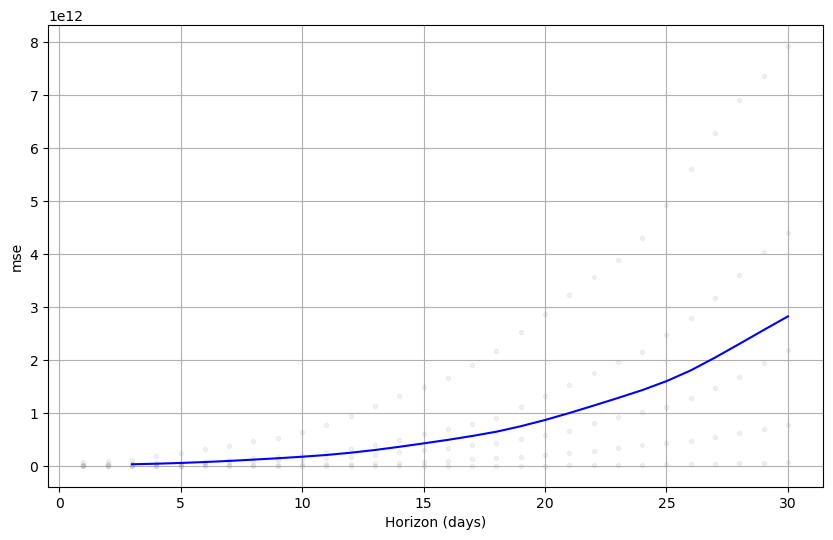

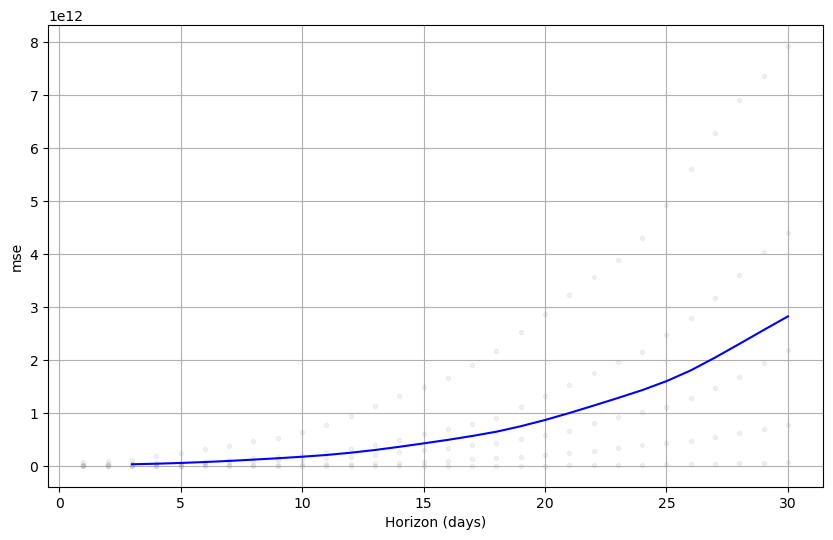

In [42]:
plot_cross_validation_metric(df_cv, metric = 'mse')